# Exploratory Data Analysis (EDA) of Banking data



## Import Modules


Note that `pd.options.mode.chained_assignment` controls how pandas handles "chained assignments" and the associated SettingWithCopyWarning. This warning arises when you attempt to modify a DataFrame or Series that might be a view of another object rather than a copy. Modifying a view can lead to unexpected behavior, as changes might not propagate to the original object, or they might affect the original object when that is not intended.

**None (Options)**:
No checks are performed for chained assignments, and no warnings or errors are raised. This effectively suppresses the SettingWithCopyWarning but can lead to silent data inconsistencies if chained assignments are not handled carefully.`

In [44]:
from datetime import datetime, timedelta
import math
import os

from dotenv import load_dotenv
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None

## Get the Bank Data Sets


[source](https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

In [45]:
load_dotenv()

True

In [46]:
# Get Path from environment variable
DATA_FILE_PATH = os.environ.get("DATA_FILE_PATH")

In [47]:
df_trans = pd.read_csv(DATA_FILE_PATH, delimiter=';', low_memory=False) #The transactions

---

# Examining the Data

* df_trans.shape
    * number of rows: 1056320
    * number of columns: 10

* df_trans.head(5) # Brief glimpse of the dataframe
    * I observe that the column names use 

* df_trans.columns
    * ['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account']

In [48]:
# rows and col count
df_trans.shape

(1056320, 10)

In [49]:
# Look at the dataframe
df_trans.head(5)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [50]:
df_trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

#### Checking for Missing Values

The following columns had missing values and the count of the missing values

```
trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931

```

In [51]:
df_trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

#### Checking for Duplicate Rows

##### Result
* There were no duplicated rows

In [52]:
df_trans.duplicated().sum()

np.int64(0)

#### Checking Data Types

```
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64

```

In [53]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [54]:
# Get Numerical Columns
numeric_cols = df_trans.select_dtypes(include="number").columns
print(numeric_cols)

Index(['trans_id', 'account_id', 'date', 'amount', 'balance', 'account'], dtype='object')


In [55]:
# Get Categorical Columns
categorical_cols = df_trans.select_dtypes(include="object").columns
print(categorical_cols)

Index(['type', 'operation', 'k_symbol', 'bank'], dtype='object')


#### Check the Number of Unique Values for Each Feature

```
trans_id      1056320
account_id       4500
date             2191
type                3
operation           5
amount          40400
balance        542739
k_symbol            8
bank               13
account          7665
```

In [56]:
df_trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                3
operation           5
amount          40400
balance        542739
k_symbol            8
bank               13
account          7665
dtype: int64

#### Getting the Categorical Feature Count Information


'type', 'operation', 'k_symbol', 'bank'

In [57]:
df_trans["type"].value_counts()

type
VYDAJ     634571
PRIJEM    405083
VYBER      16666
Name: count, dtype: int64

In [58]:
df_trans["operation"].value_counts()

operation
VYBER             434918
PREVOD NA UCET    208283
VKLAD             156743
PREVOD Z UCTU      65226
VYBER KARTOU        8036
Name: count, dtype: int64

In [59]:
df_trans["k_symbol"].value_counts()

k_symbol
UROK           183114
SLUZBY         155832
SIPO           118065
                53433
DUCHOD          30338
POJISTNE        18500
UVER            13580
SANKC. UROK      1577
Name: count, dtype: int64

In [60]:
df_trans["bank"].value_counts()

bank
QR    22285
AB    21720
ST    21711
YZ    21582
GH    21499
EF    21293
KL    21234
UV    21167
OP    21094
IJ    20525
WX    20178
MN    19623
CD    19597
Name: count, dtype: int64

----
# Cleaning up the Data


For the analysis I only need the following variables

* account_id: the account ID associated with the transaction
* amount: the amount of the transaction
* date: the date of the transaction 
* type: the type of the transaction




In [61]:
# Filtering out these features
df_trans = df_trans[["date", "account_id", "type", "amount"]]

# Convert the date into date format
df_trans["date"] = pd.to_datetime(df_trans["date"], format="%y%m%d")

#### Visualizing the Distributions

Here, I want to visualize 
* the distribution of the `amount` data and 
* look at a bar plot of the `type` data


###### Result 

The amount the `transaction amount` is skewed right with many smaller values and a few large values. Skew right indicates that the tail is on the right sides of the distribution and has a positive value for skewness. The mean of the distribution is on right side of the peak value.

The bar plot shows that the majority of the transactions typs are:
* credit: PRIJEM
* withdrawal: VYDAJ


VYBER means SEKECt



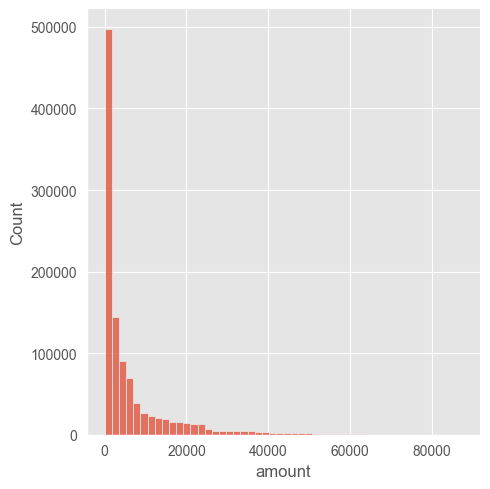

In [62]:
sns.displot(df_trans["amount"], bins=50)

<Axes: xlabel='type', ylabel='count'>

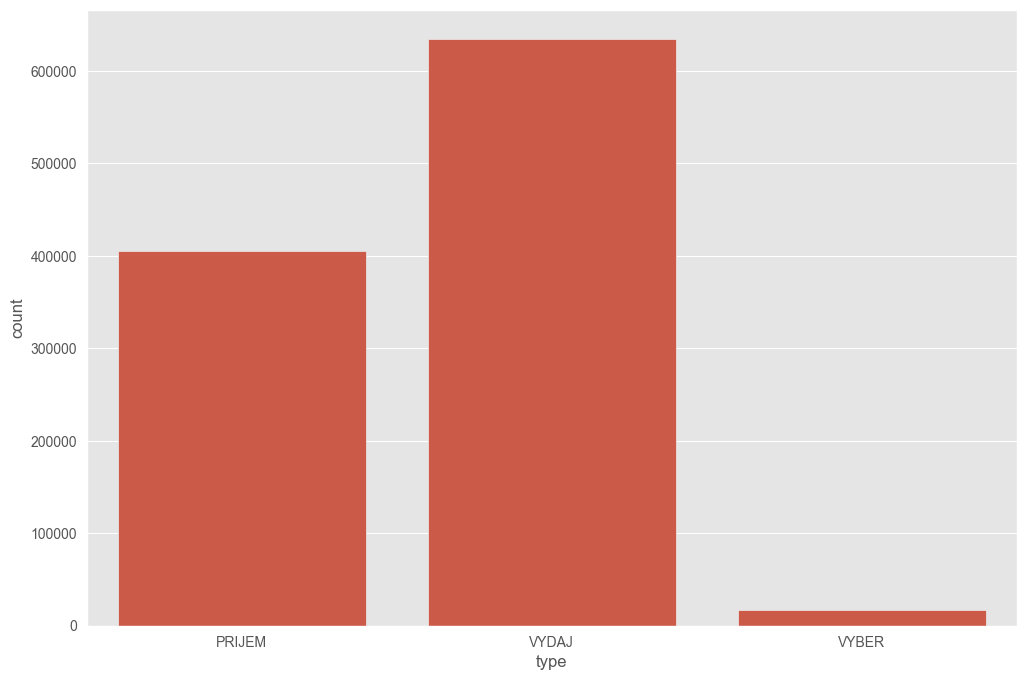

In [63]:
sns.countplot(x="type", data=df_trans)

In [64]:
# Changing the transaction types to English

to_replace = {"PRIJEM": "CREDIT", "VYDAJ": "WITHDRAWAL", "VYBER": "SELECT"}
df_trans["type"] = df_trans["type"].replace(to_replace)

Focus on withdrawal transactions. But both fraud or AML detection could involve different types of transactions.


set the index to date because it’s required by time series functions in the Pandas package.

In [65]:
df_withdrawals = df_trans.query('type == "WITHDRAWAL"').sort_values(by=["account_id", "date"]).set_index("date")

df_withdrawals.head()

,account_id,type,amount
date,,,
1995-06-22,1,WITHDRAWAL,200.0
1995-07-22,1,WITHDRAWAL,5300.0
1995-08-21,1,WITHDRAWAL,7500.0
1995-08-31,1,WITHDRAWAL,14.6
1995-09-05,1,WITHDRAWAL,2452.0


## Creating New Features

Based on our experience in the banking industry, irregularly large transaction volume from an account is a red flag.

This exploitation could also be over a period of time, since the perpetrators don’t want to alert the bank with a single large transaction.

Let’s create two new features to account for the transaction volume over a period of time:

* `sum_5days`: the accumulative withdrawal amounts from an account in the previous 5 days (including the current day).

* `count_5days`: the count of withdrawal transactions from an account in the previous 5 days (including the current day).


In [66]:
# get the sum of the previous 5 days transaction amounts.
df_withdrawals["sum_5days"] = df_withdrawals.groupby("account_id")["amount"].transform(lambda s: s.rolling(timedelta(days=5)).sum())

# get the count of the previous 5 days transactions.
df_withdrawals["count_5days"] = df_withdrawals.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())

df_withdrawals.head(20)

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1995-06-22,1,WITHDRAWAL,200.0,200.0,1.0
1995-07-22,1,WITHDRAWAL,5300.0,5300.0,1.0
1995-08-21,1,WITHDRAWAL,7500.0,7500.0,1.0
1995-08-31,1,WITHDRAWAL,14.6,14.6,1.0
1995-09-05,1,WITHDRAWAL,2452.0,2452.0,1.0
1995-09-20,1,WITHDRAWAL,700.0,700.0,1.0
1995-09-30,1,WITHDRAWAL,14.6,14.6,1.0
1995-10-05,1,WITHDRAWAL,2452.0,2452.0,1.0
1995-10-20,1,WITHDRAWAL,2900.0,2900.0,1.0


#### Exploring the data a bit more with visualizations

We see that withrawls on some days are plagued with more outliers as observed in the box plots. 

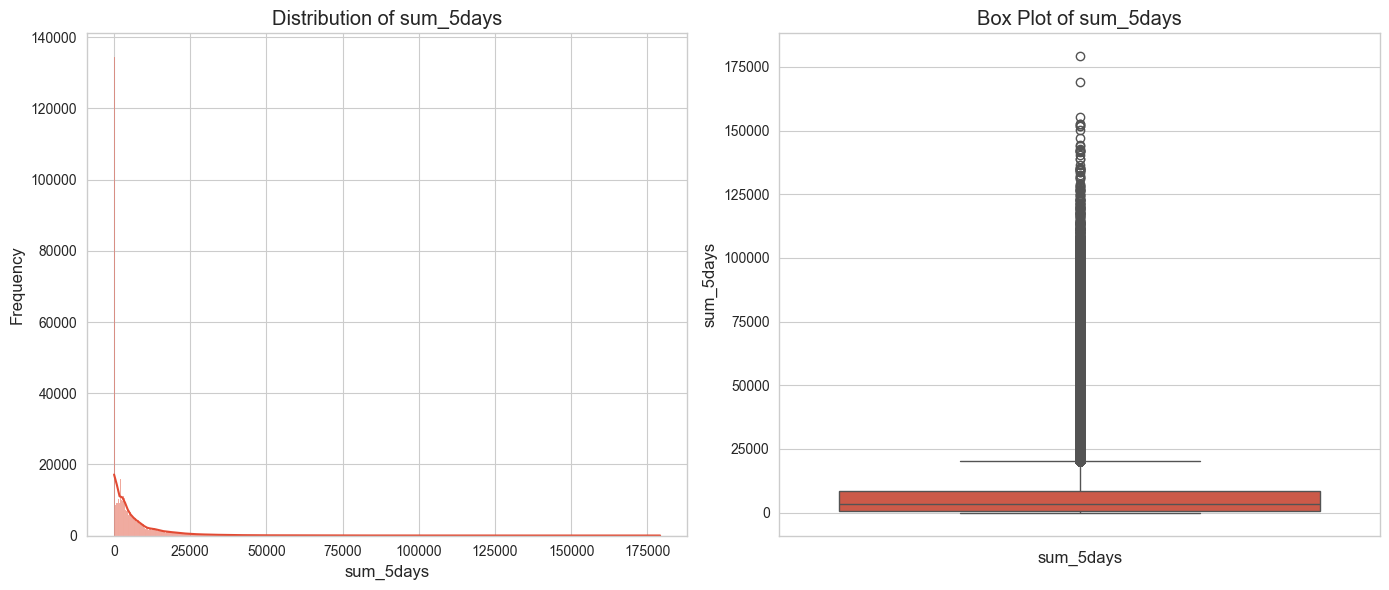

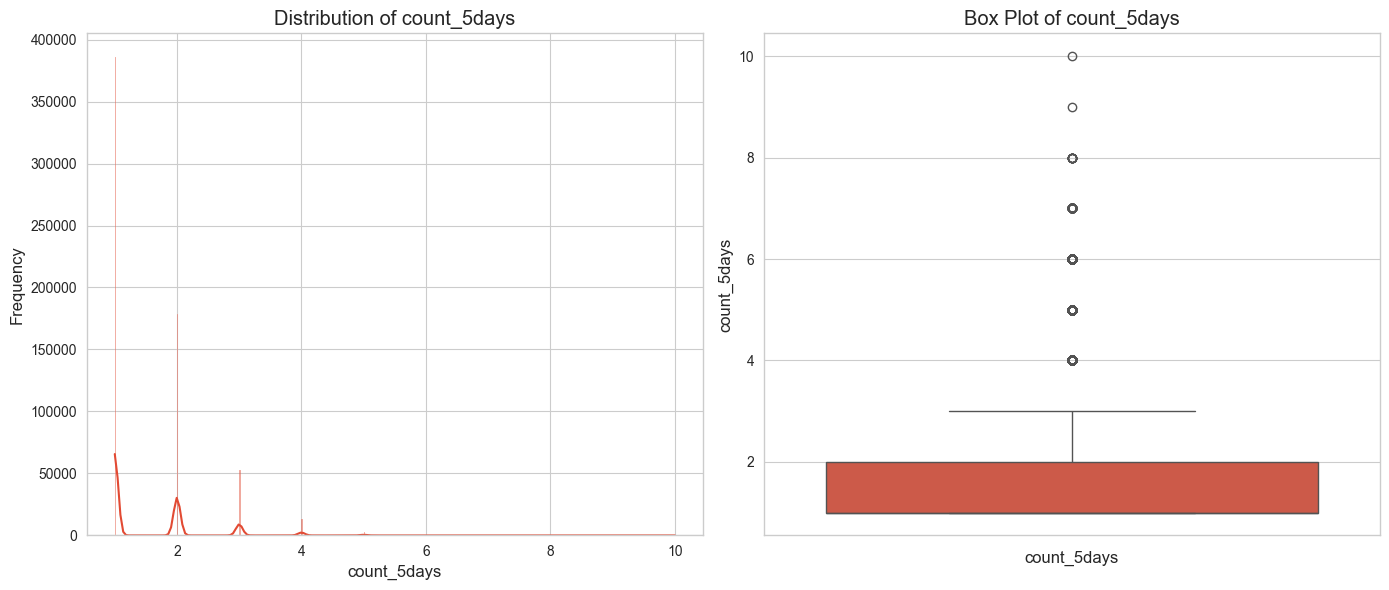

In [67]:
# Look at the distributions and boxplots
cols_to_viz = ["sum_5days", "count_5days"]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in cols_to_viz:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_withdrawals[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_withdrawals[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


In [68]:
df_withdrawals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 634571 entries, 1995-06-22 to 1998-12-25
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   account_id   634571 non-null  int64  
 1   type         634571 non-null  object 
 2   amount       634571 non-null  float64
 3   sum_5days    634571 non-null  float64
 4   count_5days  634571 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.0+ MB


<Axes: xlabel='sum_5days', ylabel='Density'>

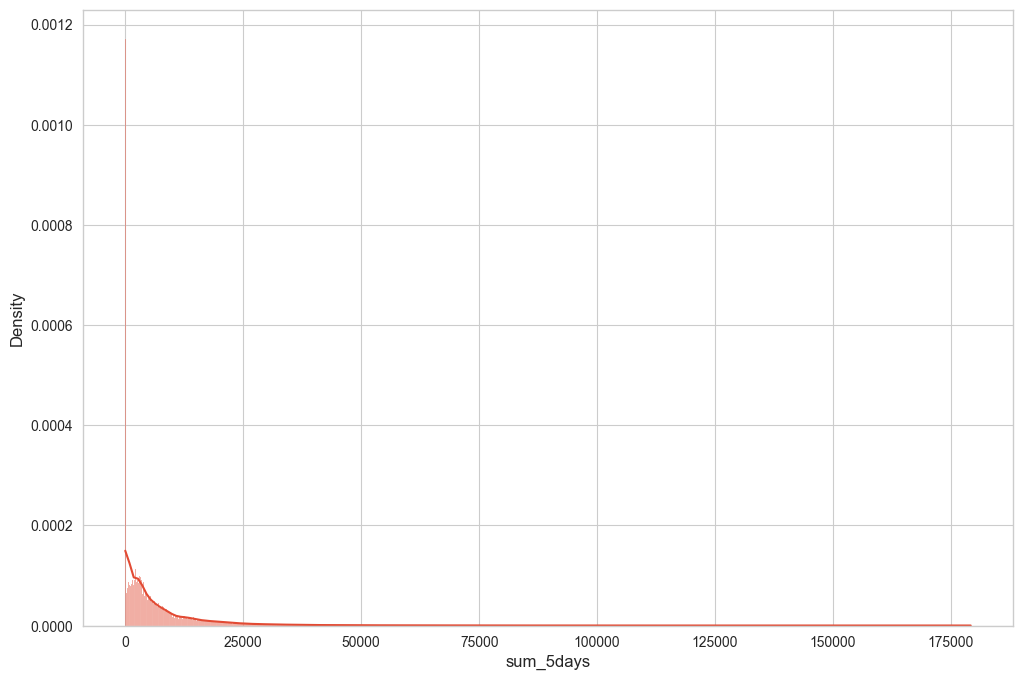

In [69]:
sns.histplot(df_withdrawals["sum_5days"], kde=True, stat="density")

<Axes: xlabel='count_5days', ylabel='count'>

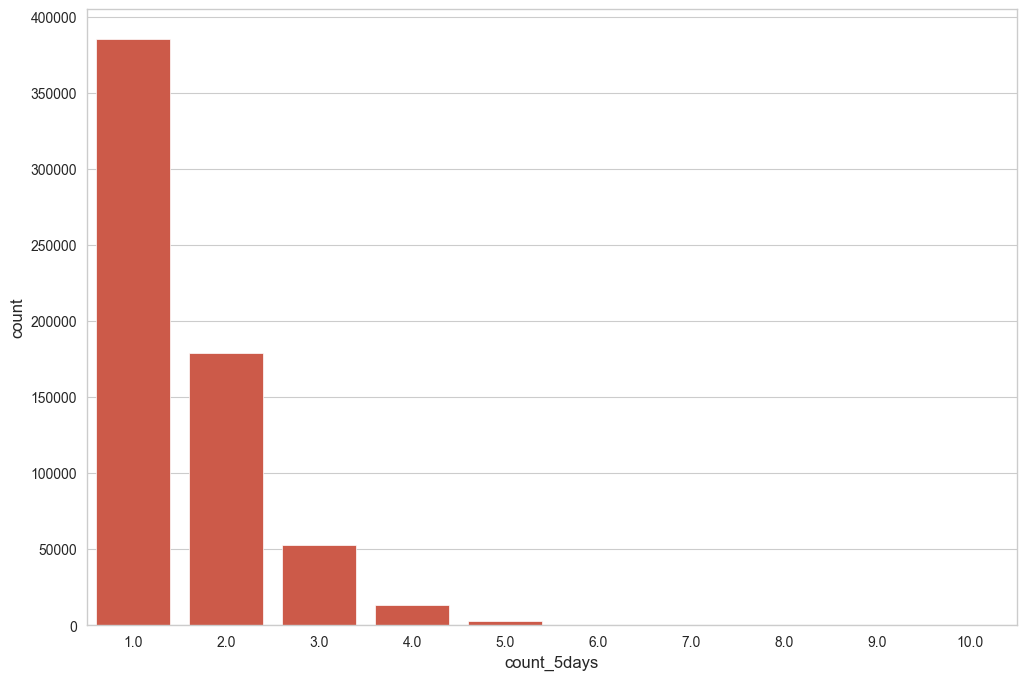

In [70]:


sns.countplot(x="count_5days", data=df_withdrawals)



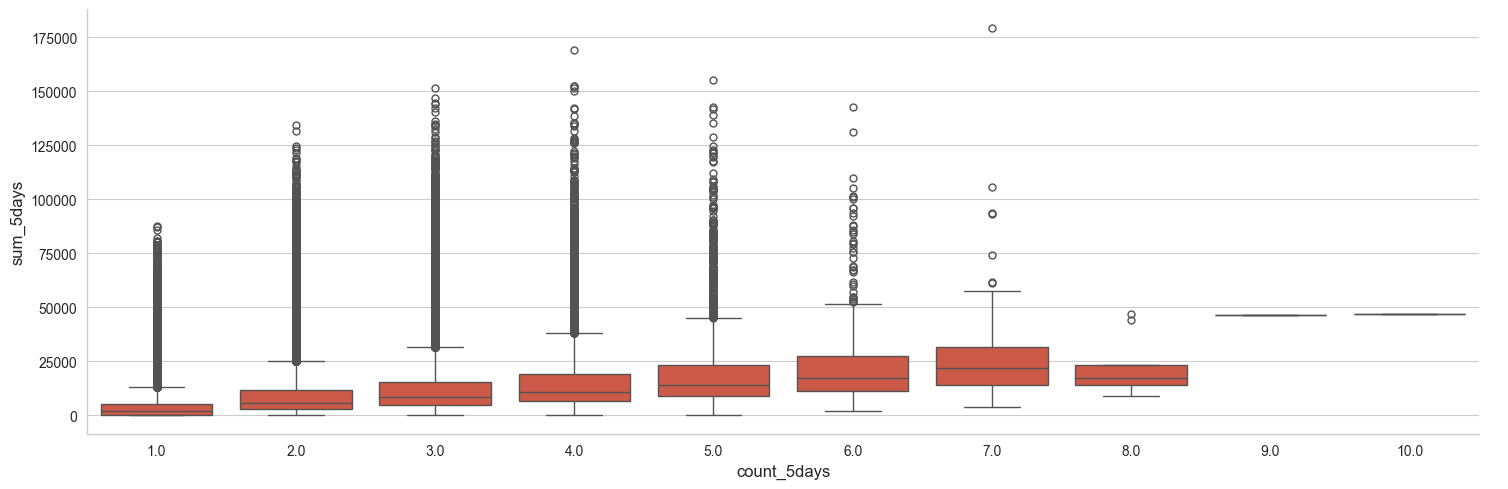

In [71]:
sns.catplot(x="count_5days", y="sum_5days",
            kind="box", data=df_withdrawals, row_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            aspect=3.0)

---- 
# Save Data set to use for outlier detection model

In [72]:
# Get Path from environment variable
PROCESSED_DATA_PATH = os.environ.get("PROCESSED_DATA_PATH")

df_withdrawals.to_csv(PROCESSED_DATA_PATH, index=False)